In [3]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cmocean
import spatialpandas.dask 
import dask as da
import dask.dataframe as dd
import matplotlib.pyplot as plt
import pandas as pd

import uxarray as ux

import holoviews as hv
from holoviews import opts
from holoviews.operation.datashader import rasterize
import datashader as ds
import datashader.transfer_functions as tf
import geoviews.feature as gf

import spatialpandas as sp

from matplotlib.tri import Triangulation as mpl_delaunay  

In [4]:
import sys
%load_ext autoreload
%autoreload 2

sys.path.insert(1, '/glade/u/home/philipc/geocat-internal-testing/polyplot/')

from polyplot import poly_plot as pp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data (Small)

In [82]:
# GeoFlow Small (6,000 nodes)
ds_base_path = "/glade/p/cisl/vast/vapor/data/Source/UGRID/NOAA-geoflow/small/"

# UXarray
ds_grid = ux.open_dataset(ds_base_path + "grid.nc",
                          ds_base_path + "v1.000000.nc",
                          ds_base_path + "v2.000000.nc",
                          ds_base_path + "v3.000000.nc")


Loading initial grid from file:  /glade/p/cisl/vast/vapor/data/Source/UGRID/NOAA-geoflow/small/grid.nc


In [83]:
# Specify Time and Elevation Slice
t, level = 0, 0

# Coordinates & Face Data
lon_cell = ds_grid.ds['mesh_node_x'].values
lat_cell = ds_grid.ds['mesh_node_y'].values
face_nodes = ds_grid.ds['mesh_face_nodes'].values

# Data Variable to Plot
v1 = ds_grid.ds['v1'][t][level].values


In [84]:
len(lon_cell)

6000

## Test with different mem.

# Testing (Small)

In [25]:
def poly_plot_workflow():
    geoflow = pp(ds=ds_grid)
    geoflow.construct_mesh()
    df = geoflow.data_mesh(name="v1", dims={"time" : 0, "meshLayers" : 0}, method="Mean")

In [26]:
%timeit -r 10 -n 10 mpl_delaunay(lon_cell, lat_cell)

18 ms ± 80.3 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [27]:
%timeit -r 10 -n 100 poly_plot_workflow()

14.6 ms ± 123 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


# Data (Large)

In [85]:
# GeoFlow Large (6 mil)
ds_base_path = "/glade/p/cisl/vast/vapor/data/Source/UGRID/NOAA-geoflow/large/"

# UXarray
ds_grid = ux.open_dataset(ds_base_path + "grid.nc",
                          ds_base_path + "v1.000000.nc",
                          ds_base_path + "v2.000000.nc",
                          ds_base_path + "v3.000000.nc")


Loading initial grid from file:  /glade/p/cisl/vast/vapor/data/Source/UGRID/NOAA-geoflow/large/grid.nc


In [86]:
# Specify Time and Elevation Slice
t, level = 0, 0

# Coordinates & Face Data
lon_cell = ds_grid.ds['mesh_node_x'].values
lat_cell = ds_grid.ds['mesh_node_y'].values
face_nodes = ds_grid.ds['mesh_face_nodes'].values

# Data Variable to Plot
v1 = ds_grid.ds['v1'][t][level].values


In [87]:
len(lon_cell)

6144000

# Testing (Large)

In [32]:
def poly_plot_workflow():
    geoflow = pp(ds=ds_grid)
    geoflow.construct_mesh()
    df = geoflow.data_mesh(name="v1", dims={"time" : 0, "meshLayers" : 0}, method="Mean")

In [36]:
%timeit -r 2 -n 3 mpl_delaunay(lon_cell, lat_cell)

36.8 s ± 1.78 ms per loop (mean ± std. dev. of 2 runs, 3 loops each)


In [37]:
%timeit -r 2 -n 3 poly_plot_workflow()

10.6 s ± 41.3 ms per loop (mean ± std. dev. of 2 runs, 3 loops each)


# Data (Large x2)

In [105]:
# GeoFlow Small (6,000 nodes)
ds_base_path = "/glade/p/cisl/vast/vapor/data/Source/UGRID/NOAA-geoflow/large/"

# UXarray
ds_grid = ux.open_dataset(ds_base_path + "grid.nc",
                          ds_base_path + "v1.000000.nc",
                          ds_base_path + "v2.000000.nc",
                          ds_base_path + "v3.000000.nc")


Loading initial grid from file:  /glade/p/cisl/vast/vapor/data/Source/UGRID/NOAA-geoflow/large/grid.nc


In [106]:
# Specify Time and Elevation Slice
t, level = 0, 0

# Coordinates & Face Data
lon_cell = ds_grid.ds['mesh_node_x'].values
lat_cell = ds_grid.ds['mesh_node_y'].values
face_nodes = ds_grid.ds['mesh_face_nodes'].values

# Data Variable to Plot
v1 = ds_grid.ds['v1'][t][level].values


In [107]:
ds_grid.ds['mesh_node_x'] = np.concatenate((lon_cell, lon_cell))
ds_grid.ds['mesh_node_y'] = np.concatenate((lat_cell, lat_cell))
ds_grid.ds['mesh_face_nodes']  = (["nMeshFaces","nFaceNodes"], np.concatenate((face_nodes, face_nodes)))
ds_grid.ds['v_large'] = np.concatenate((v1, v1))


In [108]:
# Coordinates & Face Data
lon_cell = ds_grid.ds['mesh_node_x'].values
lat_cell = ds_grid.ds['mesh_node_y'].values
face_nodes = ds_grid.ds['mesh_face_nodes'].values

# Testing (Large x2)

In [109]:
def poly_plot_workflow():
    geoflow = pp(ds=ds_grid)
    geoflow.construct_mesh()
    df = geoflow.data_mesh(name="v1", dims={"time" : 0, "meshLayers" : 0}, method="Mean")
    df = geoflow.data_mesh(name="v1", dims={"time" : 0, "meshLayers" : 0}, method="Mean")

In [79]:
%timeit -r 2 -n 3 mpl_delaunay(lon_cell, lat_cell)

54 s ± 27.9 ms per loop (mean ± std. dev. of 2 runs, 3 loops each)


In [110]:
%timeit -r 2 -n 3 poly_plot_workflow()

25.2 s ± 8.34 ms per loop (mean ± std. dev. of 2 runs, 3 loops each)


# Plots

In [111]:
n = [6000, 6144000, 2*6144000]
dl = [0.018, 36.8, 54]
poly = [0.014, 10.6, 25.2]

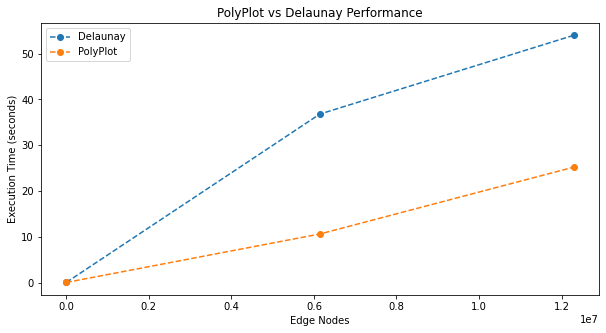

In [112]:
plt.figure(figsize=(10,5))
plt.plot(n, dl, 'o--', label="Delaunay")
plt.plot(n, poly, 'o--', label="PolyPlot")
plt.xlabel("Edge Nodes")
plt.ylabel("Execution Time (seconds)")
plt.title("PolyPlot vs Delaunay Performance")
plt.legend()